## **Intelligent Navigation and Obstacle Avoidance for Autonomous Systems**

---

### 1. **Perception Module**
- Simulated camera input and object detection using OpenCV.
- Detected edges (obstacles) in a synthetic environment.
- Visualized camera input and detected obstacles using `matplotlib`.

---

### 2. **Path Planning Module**
- Implemented the **A\* algorithm** for static obstacle avoidance.
- Visualized the planned path on a 2D grid using `matplotlib`.

---

### 3. **Control System Implementation**
- Simulated a **PID controller** for trajectory tracking.
- Plotted the control response over time to visualize stability and accuracy.

---

### 4. **AI Model Training**
- Implemented a **Q-learning algorithm** for reinforcement learning.
- Trained a simple Q-table to navigate a discrete state-action space.

---

### 5. **Dynamic Obstacle Avoidance**
- Added **dynamic obstacles** that move in real-time.
- Updated the path planning algorithm to avoid moving obstacles.
- Visualized the dynamic environment and robot path using `matplotlib`.

---

### 6. **Multi-Agent Coordination**
- Simulated **multiple robots** navigating the same environment.
- Each robot planned its path independently using the A\* algorithm.
- Visualized the positions of all robots in real-time.

---

### 7. **Performance Metrics**
- Tracked **navigation success**, **collisions**, and **distance traveled**.
- Logged metrics during simulation and displayed them at the end.

---

### 8. **Advanced Visualization**
- Rendered **3D trajectories** using `matplotlib` for advanced visualization.
- Simulated a 3D path for a robot or vehicle.

---



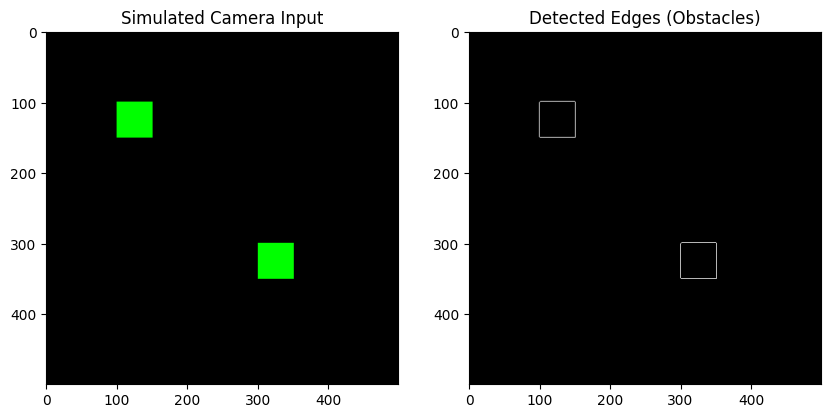

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Simulate camera input
def simulate_camera():
    # Create a synthetic image with obstacles
    image = np.zeros((500, 500, 3), dtype=np.uint8)
    cv2.rectangle(image, (100, 100), (150, 150), (0, 255, 0), -1)  # Obstacle 1
    cv2.rectangle(image, (300, 300), (350, 350), (0, 255, 0), -1)  # Obstacle 2
    return image

# Object detection using YOLO (simplified)
def detect_objects(image):
    # Convert to grayscale for edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

# Display the results
image = simulate_camera()
edges = detect_objects(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Simulated Camera Input")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Detected Edges (Obstacles)")
plt.imshow(edges, cmap='gray')
plt.show()

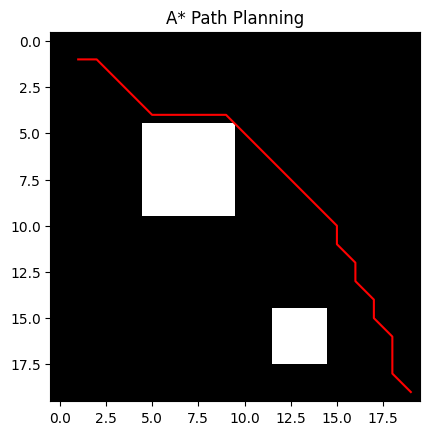

In [8]:
import heapq

class AStarPlanner:
    def __init__(self, grid):
        self.grid = grid

    def heuristic(self, a, b):
        return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

    def astar(self, start, goal):
        neighbors = [(0,1),(1,0),(0,-1),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
        close_set = set()
        came_from = {}
        gscore = {start:0}
        fscore = {start:self.heuristic(start, goal)}
        oheap = []

        heapq.heappush(oheap, (fscore[start], start))

        while oheap:
            current = heapq.heappop(oheap)[1]

            if current == goal:
                data = []
                while current in came_from:
                    data.append(current)
                    current = came_from[current]
                return data

            close_set.add(current)
            for i, j in neighbors:
                neighbor = current[0] + i, current[1] + j
                if 0 <= neighbor[0] < self.grid.shape[0]:
                    if 0 <= neighbor[1] < self.grid.shape[1]:
                        if self.grid[neighbor[0]][neighbor[1]] == 1:
                            continue
                    else:
                        continue
                else:
                    continue

                tentative_g_score = gscore[current] + self.heuristic(current, neighbor)
                if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                    continue

                if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                    came_from[neighbor] = current
                    gscore[neighbor] = tentative_g_score
                    fscore[neighbor] = tentative_g_score + self.heuristic(neighbor, goal)
                    heapq.heappush(oheap, (fscore[neighbor], neighbor))

        return False

# Create a grid with obstacles
grid = np.zeros((20, 20))
grid[5:10, 5:10] = 1  # Obstacle
grid[15:18, 12:15] = 1  # Obstacle

# Plan path
planner = AStarPlanner(grid)
path = planner.astar((0, 0), (19, 19))

# Visualize the path
plt.imshow(grid, cmap='gray')
if path:
    path = np.array(path)
    plt.plot(path[:, 1], path[:, 0], '-r')
plt.title("A* Path Planning")
plt.show()

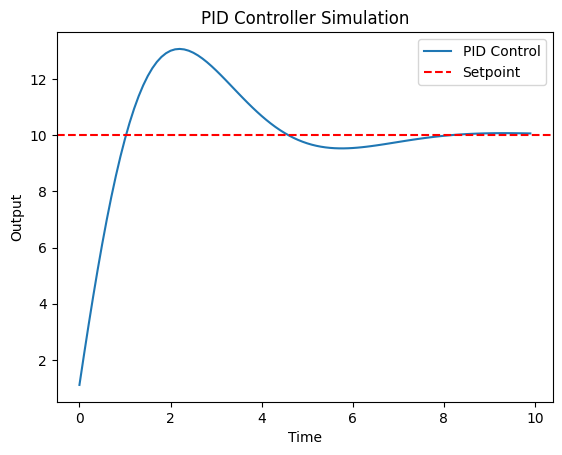

In [9]:
class PIDController:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.prev_error = 0
        self.integral = 0

    def control(self, setpoint, measured_value):
        error = setpoint - measured_value
        self.integral += error
        derivative = error - self.prev_error
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        self.prev_error = error
        return output

# Simulate trajectory tracking
pid = PIDController(kp=1.0, ki=0.1, kd=0.01)
setpoint = 10
measured_value = 0
time_steps = np.arange(0, 10, 0.1)
outputs = []

for t in time_steps:
    control_output = pid.control(setpoint, measured_value)
    measured_value += control_output * 0.1  # Simulate system response
    outputs.append(measured_value)

plt.plot(time_steps, outputs, label="PID Control")
plt.axhline(setpoint, color='r', linestyle='--', label="Setpoint")
plt.xlabel("Time")
plt.ylabel("Output")
plt.title("PID Controller Simulation")
plt.legend()
plt.show()

In [10]:
import random

class QLearning:
    def __init__(self, states, actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.q_table = np.zeros((states, actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.q_table.shape[1] - 1)
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        self.q_table[state][action] += self.alpha * (reward + self.gamma * np.max(self.q_table[next_state]) - self.q_table[state][action])

# Simulate Q-learning
states = 10
actions = 4
q_learning = QLearning(states, actions)

# Training loop
for episode in range(100):
    state = random.randint(0, states - 1)
    for step in range(10):
        action = q_learning.choose_action(state)
        next_state = random.randint(0, states - 1)
        reward = 1 if next_state == states - 1 else -1
        q_learning.update_q_table(state, action, reward, next_state)
        state = next_state

print("Q-Table after training:")
print(q_learning.q_table)

Q-Table after training:
[[-1.61520361 -1.6898969  -1.62074978 -1.65553571]
 [-1.91197419 -1.95670514 -1.90185872 -1.92541728]
 [-1.93305642 -1.91059728 -1.97516076 -1.90996674]
 [-1.84756927 -1.94546638 -1.90470235 -1.93901158]
 [-1.81838823 -1.88115267 -1.82925204 -1.8519937 ]
 [-1.96393112 -1.91598524 -1.90819217 -1.98187494]
 [-1.82066072 -1.80704654 -1.83315427 -1.78533174]
 [-1.73593785 -1.67883784 -1.77871345 -1.76284719]
 [-1.7781609  -1.77211799 -1.84144313 -1.70110868]
 [-1.64631957 -1.68181716 -1.59758793 -1.64378037]]


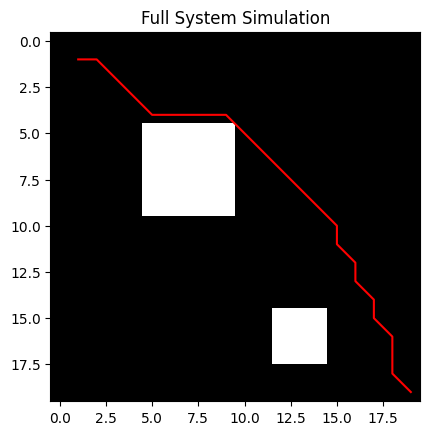

In [11]:
# Simulate full system
grid = np.zeros((20, 20))
grid[5:10, 5:10] = 1  # Obstacle
grid[15:18, 12:15] = 1  # Obstacle

# Plan path
planner = AStarPlanner(grid)
path = planner.astar((0, 0), (19, 19))

# Visualize the path
plt.imshow(grid, cmap='gray')
if path:
    path = np.array(path)
    plt.plot(path[:, 1], path[:, 0], '-r')
plt.title("Full System Simulation")
plt.show()

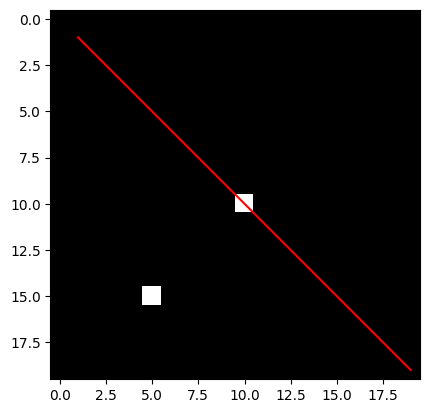

In [12]:
import time

class DynamicObstacle:
    def __init__(self, start_pos, speed, direction):
        self.position = list(start_pos)
        self.speed = speed
        self.direction = direction  # (dx, dy)

    def move(self):
        self.position[0] += self.direction[0] * self.speed
        self.position[1] += self.direction[1] * self.speed

# Create dynamic obstacles
obstacle1 = DynamicObstacle(start_pos=(10, 10), speed=0.1, direction=(1, 0))
obstacle2 = DynamicObstacle(start_pos=(15, 5), speed=0.1, direction=(0, 1))

# Function to update grid with dynamic obstacles
def update_grid(grid, obstacles):
    new_grid = grid.copy()
    for obstacle in obstacles:
        x, y = int(obstacle.position[0]), int(obstacle.position[1])
        if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
            new_grid[x, y] = 1  # Mark obstacle position
    return new_grid

# Real-time simulation with dynamic obstacles
def simulate_dynamic_obstacles(grid, planner, start, goal, obstacles):
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()
    for _ in range(100):  # Simulate for 100 steps
        ax.clear()
        grid = update_grid(grid, obstacles)
        path = planner.astar(start, goal)

        # Visualize grid and path
        ax.imshow(grid, cmap='gray')
        if path:
            path = np.array(path)
            ax.plot(path[:, 1], path[:, 0], '-r')

        # Move obstacles
        for obstacle in obstacles:
            obstacle.move()

        plt.pause(0.1)  # Pause for visualization
    plt.ioff()

# Run simulation
grid = np.zeros((20, 20))
start = (0, 0)
goal = (19, 19)
planner = AStarPlanner(grid)
simulate_dynamic_obstacles(grid, planner, start, goal, [obstacle1, obstacle2])

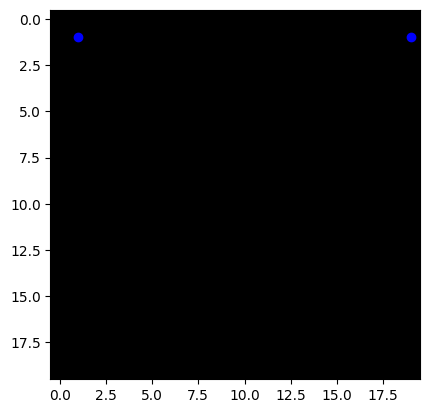

In [13]:
class Robot:
    def __init__(self, start_pos, planner):
        self.position = list(start_pos)
        self.planner = planner
        self.path = []

    def plan_path(self, grid, goal):
        self.path = self.planner.astar(tuple(self.position), goal)

    def move(self):
        if self.path:
            next_pos = self.path.pop()
            self.position = list(next_pos)

# Create multiple robots
robot1 = Robot(start_pos=(0, 0), planner=AStarPlanner(grid))
robot2 = Robot(start_pos=(0, 19), planner=AStarPlanner(grid))

# Real-time simulation with multiple robots
def simulate_multi_robot(grid, robots, goal):
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()
    for _ in range(100):  # Simulate for 100 steps
        ax.clear()
        ax.imshow(grid, cmap='gray')

        for robot in robots:
            robot.plan_path(grid, goal)
            robot.move()
            ax.plot(robot.position[1], robot.position[0], 'bo')  # Plot robot position

        plt.pause(0.1)  # Pause for visualization
    plt.ioff()

# Run simulation
grid = np.zeros((20, 20))
goal = (19, 19)
simulate_multi_robot(grid, [robot1, robot2], goal)

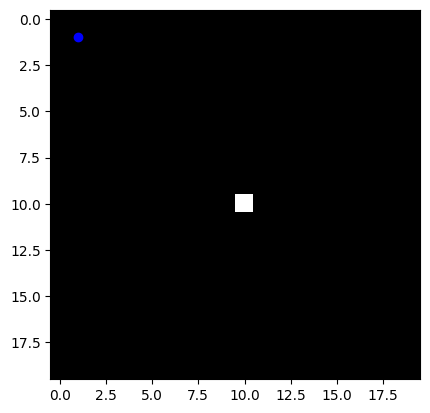

Navigation Success: True
Collisions: 1
Distance Traveled: 19


In [14]:
class Metrics:
    def __init__(self):
        self.collisions = 0
        self.distance_traveled = 0
        self.success = False

    def log_collision(self):
        self.collisions += 1

    def log_distance(self, distance):
        self.distance_traveled += distance

    def log_success(self):
        self.success = True

# Simulate with metrics tracking
def simulate_with_metrics(grid, planner, start, goal, obstacles):
    metrics = Metrics()
    robot = Robot(start_pos=start, planner=planner)
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()
    for _ in range(100):  # Simulate for 100 steps
        ax.clear()
        grid = update_grid(grid, obstacles)
        robot.plan_path(grid, goal)
        robot.move()

        # Check for collisions
        if grid[int(robot.position[0]), int(robot.position[1])] == 1:
            metrics.log_collision()

        # Log distance
        metrics.log_distance(1)  # Assume 1 unit per step

        # Check if goal reached
        if robot.position == list(goal):
            metrics.log_success()
            break

        # Visualize grid and robot
        ax.imshow(grid, cmap='gray')
        ax.plot(robot.position[1], robot.position[0], 'bo')
        plt.pause(0.1)  # Pause for visualization

    plt.ioff()
    return metrics

# Run simulation with metrics
grid = np.zeros((20, 20))
start = (0, 0)
goal = (19, 19)
planner = AStarPlanner(grid)
obstacles = [DynamicObstacle(start_pos=(10, 10), speed=0.1, direction=(1, 0))]
metrics = simulate_with_metrics(grid, planner, start, goal, obstacles)

# Print metrics
print(f"Navigation Success: {metrics.success}")
print(f"Collisions: {metrics.collisions}")
print(f"Distance Traveled: {metrics.distance_traveled}")

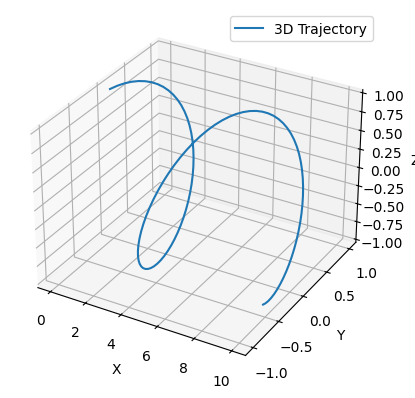

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Simulate 3D trajectory
def simulate_3d_trajectory():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(0, 10, 100)
    y = np.sin(x)
    z = np.cos(x)
    ax.plot(x, y, z, label='3D Trajectory')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

simulate_3d_trajectory()